# Importing Library Files

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Reading the input files

In [2]:
original = cv2.imread('dog.jpeg')
background_image = cv2.imread('bgimg.jpeg')

In [3]:
imageShape = original.shape
print("Original Image : " , imageShape)

Original Image :  (168, 299, 3)


# BGR to RGB

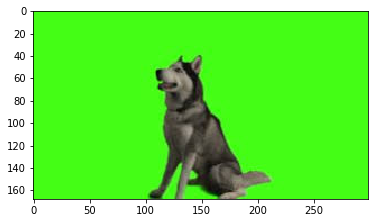

In [97]:
# original image BGR to RGB
original_image_in_RGB = np.copy(original)
original_image_in_RGB = cv2.cvtColor(original_image_in_RGB, cv2.COLOR_BGR2RGB)

# original image RGB to HSV
original_image_in_HSV = np.copy(original_image_in_RGB)
original_image_in_HSV = cv2.cvtColor(original_image_in_HSV, cv2.COLOR_RGB2HSV)

plt.imshow(original_image_in_RGB)

In [73]:
print(original_image_in_RGB[0][175])

[ 68 254  21]


# Lower bound and Upper Bound

In [86]:
lower_bound = np.array([58, 250, 14]) # green
upper_bound = np.array([80, 255, 27]) # white

# Creating mask

In [87]:
mask = cv2.inRange(original_image_in_RGB, lower_bound, upper_bound)

In [88]:
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

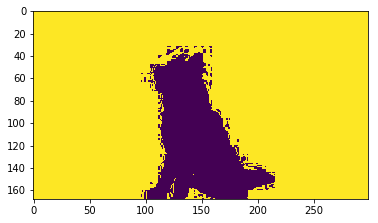

In [89]:
plt.imshow(mask)

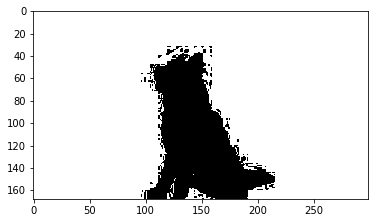

In [90]:
plt.imshow(mask,cmap='gray')

#  Applying mask to original image

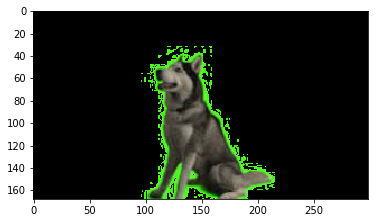

In [91]:
original_image_with_mask = np.copy(original_image_in_RGB)

original_image_with_mask[mask != 0] = [0,0,0]

plt.imshow(original_image_with_mask)

# Converting BGR to RGB and Cropping Image

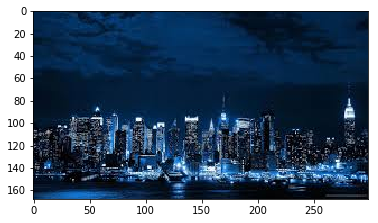

In [92]:
# Background image BGR to RGB
background_image_in_RGB = np.copy(background_image)
background_image_in_RGB = cv2.cvtColor(background_image_in_RGB, cv2.COLOR_BGR2RGB)

# Cropping the Background image similar to the original image
crop_bgimage = background_image_in_RGB[0:168, 0:299]

plt.imshow(crop_bgimage)

In [93]:
crop_bgimage.shape

(168, 299, 3)

# Applying Mask to the Background Image

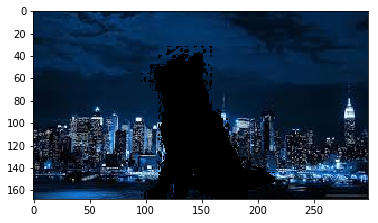

In [94]:
crop_bgimage[mask == 0] = [0, 0, 0]

plt.imshow(crop_bgimage)

# Merging the original image with Background Image

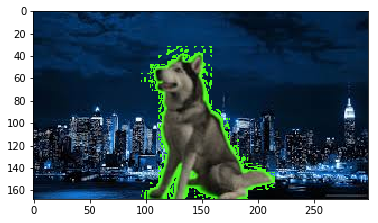

In [95]:
output = original_image_with_mask + crop_bgimage

plt.imshow(output)